In [4]:
import pandas as pn
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as ticker
from datetime import datetime
import matplotlib.dates as md

df = pn.read_csv(".//static//csv//Yamana_Gold_Inc._AUY.csv")
print(df.columns)

df["date"] = df.apply(lambda row: datetime.strptime(row["Date"], "%m/%d/%Y"), axis=1)
df.info()
#print(df['date'].head)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5251 entries, 0 to 5250
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5251 non-null   object        
 1   Open       5251 non-null   float64       
 2   High       5251 non-null   float64       
 3   Low        5251 non-null   float64       
 4   Close      5251 non-null   float64       
 5   Adj Close  5251 non-null   float64       
 6   Volume     5251 non-null   int64         
 7   date       5251 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 328.3+ KB


Разделим на 3 выборки


In [5]:
from sklearn.model_selection import train_test_split

# Разделение данных на обучающую и тестовую выборки (80% - обучение, 20% - тест)
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Разделение обучающей выборки на обучающую и контрольную (80% - обучение, 20% - контроль)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

print("Размер обучающей выборки:", len(train_data))
print("Размер контрольной выборки:", len(val_data))
print("Размер тестовой выборки:", len(test_data))

Размер обучающей выборки: 3360
Размер контрольной выборки: 840
Размер тестовой выборки: 1051


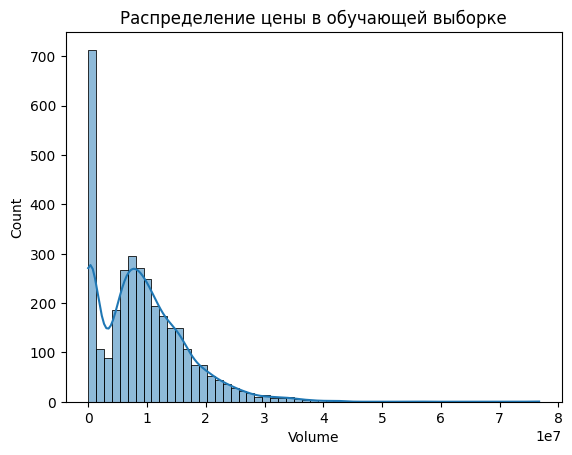

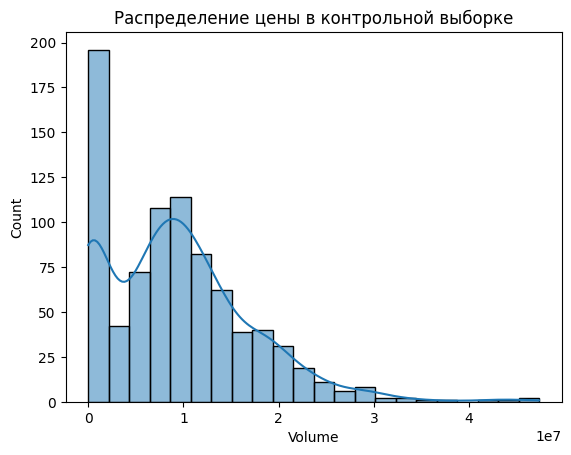

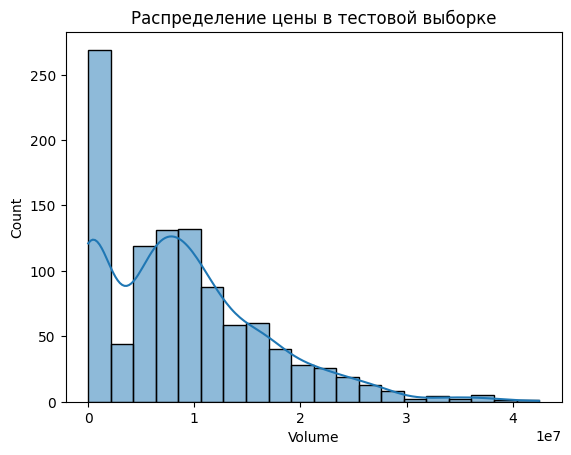

In [6]:

import seaborn as sns
import matplotlib.pyplot as plt

# Гистограмма распределения объема в обучающей выборке
sns.histplot(train_data["Volume"], kde=True)
plt.title('Распределение цены в обучающей выборке')
plt.show()

# Гистограмма распределения объема в контрольной выборке
sns.histplot(val_data["Volume"], kde=True)
plt.title('Распределение цены в контрольной выборке')
plt.show()

# Гистограмма распределения объема в тестовой выборке
sns.histplot(test_data["Volume"], kde=True)
plt.title('Распределение цены в тестовой выборке')
plt.show()

## Процесс конструирования признаков



### Унитарное кодирование категориальных признаков (one-hot encoding)

One-hot encoding: Преобразование категориальных признаков в бинарные векторы.

In [7]:
import pandas as pd

# Пример категориальных признаков
categorical_features = [
    "Date",
    "date"
]

# Применение one-hot encoding
train_data_encoded = pd.get_dummies(train_data, columns=categorical_features)
val_data_encoded = pd.get_dummies(val_data, columns=categorical_features)
test_data_encoded = pd.get_dummies(test_data, columns=categorical_features)

### Дискретизация числовых признаков 

In [8]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np


labels = ["low hight price", "medium hight price", "big hight price"]
num_bins = 3

hist1, bins1 = np.histogram(
    df["High"].fillna(df["High"].median()), bins=num_bins
)
bins1, hist1

pd.concat([df["High"], pd.cut(df["High"], list(bins1))], axis=1).tail(20)


High            High
5231  5.83  (1.143, 7.625]
5232  5.93  (1.143, 7.625]
5233  6.06  (1.143, 7.625]
5234  6.04  (1.143, 7.625]
5235  6.15  (1.143, 7.625]
5236  6.23  (1.143, 7.625]
5237  6.40  (1.143, 7.625]
5238  6.25  (1.143, 7.625]
5239  6.33  (1.143, 7.625]
5240  6.25  (1.143, 7.625]
5241  6.03  (1.143, 7.625]
5242  5.72  (1.143, 7.625]
5243  5.65  (1.143, 7.625]
5244  5.44  (1.143, 7.625]
5245  5.61  (1.143, 7.625]
5246  5.69  (1.143, 7.625]
5247  5.39  (1.143, 7.625]
5248  5.53  (1.143, 7.625]
5249  5.61  (1.143, 7.625]
5250  5.66  (1.143, 7.625]

In [9]:
pd.concat(
    [df["High"], pd.cut(df["High"], list(bins1), labels=labels)], axis=1
).head(20)

High             High
0   3.428571  low hight price
1   3.428571  low hight price
2   3.714286  low hight price
3   3.714286  low hight price
4   3.714286  low hight price
5   3.714286  low hight price
6   3.714286  low hight price
7   3.714286  low hight price
8   3.428571  low hight price
9   3.428571  low hight price
10  3.428571  low hight price
11  3.428571  low hight price
12  3.428571  low hight price
13  2.857143  low hight price
14  3.142857  low hight price
15  3.142857  low hight price
16  3.428571  low hight price
17  3.714286  low hight price
18  3.142857  low hight price
19  3.142857  low hight price

### Ручной синтез

In [10]:
# Пример синтеза признака среднего значения в максимальной и минимальной цене
train_data_encoded["medium"] = train_data_encoded["High"] / train_data_encoded["Low"]
val_data_encoded["medium"] = val_data_encoded["High"] / val_data_encoded["Low"]
test_data_encoded["medium"] = test_data_encoded["High"] / test_data_encoded["Low"]

Масштабирование признаков - это процесс преобразования числовых признаков таким образом, чтобы они имели одинаковый масштаб. Это важно для многих алгоритмов машинного обучения, которые чувствительны к масштабу признаков, таких как линейная регрессия, метод опорных векторов (SVM) и нейронные сети.

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Пример масштабирования числовых признаков
numerical_features = ["Open", "Close"]

scaler = StandardScaler()
train_data_encoded[numerical_features] = scaler.fit_transform(train_data_encoded[numerical_features])
val_data_encoded[numerical_features] = scaler.transform(val_data_encoded[numerical_features])
test_data_encoded[numerical_features] = scaler.transform(test_data_encoded[numerical_features])

### Конструирование признаков с применением фреймворка Featuretools

In [12]:
import featuretools as ft

# Определение сущностей
es = ft.EntitySet(id='gold_data')

es = es.add_dataframe(dataframe_name='yamana', dataframe=train_data_encoded, index='id')


# Генерация признаков
feature_matrix, feature_defs = ft.dfs(
    entityset=es, target_dataframe_name="yamana", max_depth=2
)

# Преобразование признаков для контрольной и тестовой выборок
val_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=val_data_encoded.index)
test_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=test_data_encoded.index)

d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\featuretools\entityset\entityset.py:1733: UserWarning: index id not found in dataframe, creating new integer column
  warnings.warn(
d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\featuretools\synthesis\deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(
d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:143: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, default_df], sort=True)
d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\woodwork\logical_types.py:841: FutureWarning: Downcasting behavior in `replace` is deprecated and will be remov

### Оценка качества каждого набора признаков
Предсказательная способность
Метрики: RMSE, MAE, R²

Методы: Обучение модели на обучающей выборке и оценка на контрольной и тестовой выборках.

Скорость вычисления
Методы: Измерение времени выполнения генерации признаков и обучения модели.

Надежность
Методы: Кросс-валидация, анализ чувствительности модели к изменениям в данных.

Корреляция
Методы: Анализ корреляционной матрицы признаков, удаление мультиколлинеарных признаков.

Цельность
Методы: Проверка логической связи между признаками и целевой переменной, интерпретация результатов модели.

In [13]:
import featuretools as ft

# Определение сущностей
es = ft.EntitySet(id='gold_data')
es = es.add_dataframe(
    dataframe_name="yamana", dataframe=train_data_encoded, index="id"
)

# Генерация признаков
feature_matrix, feature_defs = ft.dfs(
    entityset=es, target_dataframe_name="yamana", max_depth=2
)

# Преобразование признаков для контрольной и тестовой выборок
val_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=val_data_encoded.index)
test_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=test_data_encoded.index)

d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\featuretools\entityset\entityset.py:724: UserWarning: A Woodwork-initialized DataFrame was provided, so the following parameters were ignored: index
  warnings.warn(
d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\featuretools\synthesis\deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(
d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:143: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, default_df], sort=True)
d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\woodwork\logical_types.py:841: FutureWarning: Downcasting behavior in `replace

d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 1764152.3991770656
R²: 0.942082609353535
MAE: 1161195.586464497
Cross-validated RMSE: 4835663.342127571


d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Train RMSE: 1789275.1500045008
Train R²: 0.944270691246794
Train MAE: 1134044.475345238


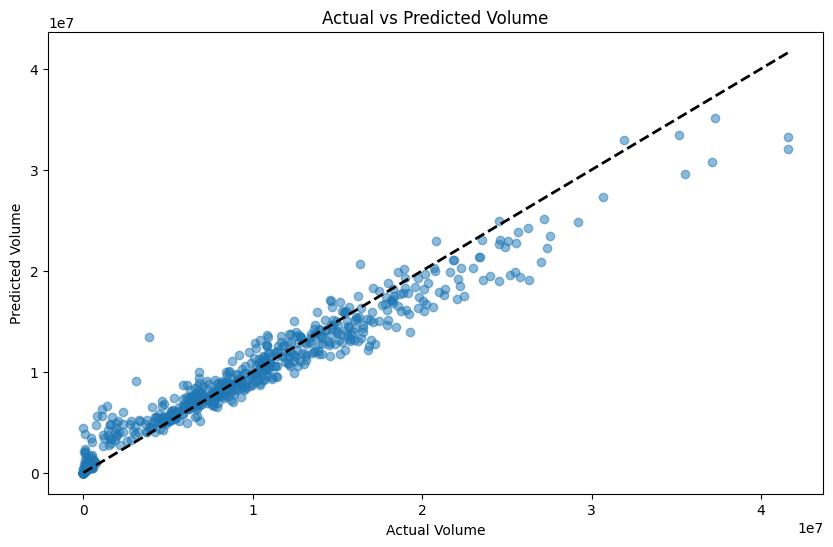

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# Удаление строк с NaN
feature_matrix = feature_matrix.dropna()
val_feature_matrix = val_feature_matrix.dropna()
test_feature_matrix = test_feature_matrix.dropna()

# Разделение данных на обучающую и тестовую выборки
X_train = feature_matrix.drop("Volume", axis=1)
y_train = feature_matrix["Volume"]
X_val = val_feature_matrix.drop("Volume", axis=1)
y_val = val_feature_matrix["Volume"]
X_test = test_feature_matrix.drop("Volume", axis=1)
y_test = test_feature_matrix["Volume"]

# Выбор модели
model = RandomForestRegressor(random_state=42)

# Обучение модели
model.fit(X_train, y_train)

# Предсказание и оценка
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")
print(f"MAE: {mae}")

# Кросс-валидация
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv = (-scores.mean())**0.5
print(f"Cross-validated RMSE: {rmse_cv}")

# Анализ важности признаков
feature_importances = model.feature_importances_
feature_names = X_train.columns


# Проверка на переобучение
y_train_pred = model.predict(X_train)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

print(f"Train RMSE: {rmse_train}")
print(f"Train R²: {r2_train}")
print(f"Train MAE: {mae_train}")

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Volume")
plt.ylabel("Predicted Volume")
plt.title("Actual vs Predicted Volume")
plt.show()

Точность предсказаний: Модель показывает довольно высокий R² (0.944), что указывает на хорошее объяснение вариации распродаж. Значения RMSE и MAE довольно низки, что говорит о том, что модель достаточно точно предсказывает цены.

Переобучение: Разница между RMSE на обучающей и тестовой выборках не очень большая, что указывает на то, что переобучение не является критическим. Однако, стоит быть осторожным и продолжать мониторинг этого показателя.
